### Imports and definitions

c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2 0 0 1 1 2] [3 2 3 2 3 1]
['green', 'red', 'red', 'blue', 'blue', 'green']
{0: '0: N. America (3)', 1: '1: S. America (2)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (3)', 5: '5: Oceania (1)'}


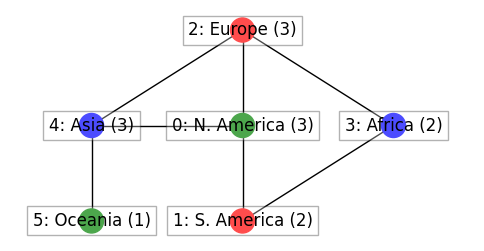

In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import random
import torch
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [0, 2, 3, 0, 0, 0],
    [0, 0, 0, 2, 3, 0],
    [3, 0, 0, 0, 0, 1]
])

layout = {0: np.array([0.5, 0.5]),
           1: np.array([0.5, 0.3]),
           2: np.array([0.5, 0.7]),
           3: np.array([0.7, 0.5]),
           4: np.array([0.3, 0.5]),
           5: np.array([0.3, 0.3])
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

### Basic tests

Generate images of a game

In [2]:
# Start
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
game.agents = [RandomAgent() for _ in range(nb_player)]

# Play some turns
game.run_and_save()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Evaluate a Random agent

Evaluation: 100%|██████████| 1000/1000 [00:02<00:00, 366.81it/s]


Win rate: 0.55
Defeat rate: 0.45
Tie rate: 0.0
Average number of turns: [23, 9, 14, 15, 10, 10, 7, 15, 19, 17, 8, 7, 7, 6, 5, 8, 11, 8, 7, 11, 10, 14, 32, 7, 9, 7, 7, 7, 26, 6, 15, 9, 6, 6, 7, 5, 4, 9, 12, 6, 4, 8, 4, 16, 15, 8, 22, 15, 5, 13, 17, 5, 12, 12, 7, 25, 8, 12, 6, 6, 15, 10, 9, 14, 11, 11, 4, 9, 14, 14, 8, 8, 5, 4, 6, 7, 11, 5, 13, 6, 10, 12, 25, 12, 7, 5, 10, 5, 11, 6, 15, 24, 4, 5, 10, 16, 6, 20, 7, 9, 15, 14, 9, 12, 17, 9, 9, 6, 5, 13, 18, 9, 6, 5, 4, 14, 14, 4, 5, 23, 5, 11, 7, 13, 6, 7, 6, 8, 6, 9, 7, 14, 9, 9, 13, 9, 4, 5, 10, 11, 10, 8, 6, 4, 7, 6, 8, 11, 11, 18, 15, 21, 5, 11, 7, 4, 12, 4, 9, 6, 24, 17, 6, 6, 20, 9, 5, 14, 4, 6, 16, 15, 15, 20, 14, 6, 7, 5, 9, 11, 7, 6, 6, 12, 6, 9, 4, 7, 16, 7, 13, 13, 10, 8, 17, 26, 9, 9, 13, 6, 9, 7, 8, 10, 9, 11, 4, 6, 11, 6, 9, 9, 6, 11, 10, 8, 9, 5, 6, 9, 7, 26, 19, 21, 21, 9, 11, 12, 9, 24, 10, 9, 18, 9, 6, 11, 5, 6, 9, 31, 8, 16, 6, 8, 42, 13, 12, 5, 13, 10, 4, 12, 8, 12, 13, 11, 11, 9, 13, 11, 12, 10, 16, 6, 17, 14, 21, 14, 

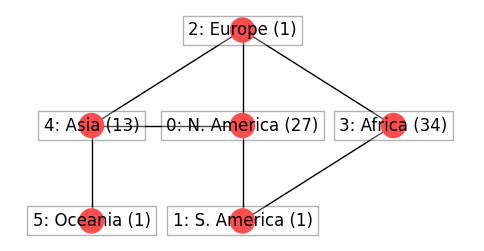

In [30]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)

game.agents = [RandomAgent(), RandomAgent(), RandomAgent()]

game.reset_world()
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=1000, max_turns=100)

print(f"Win rate: {win_rate}")
print(f"Defeat rate: {defeat_rate}")
print(f"Tie rate: {tie_rate}")
print(f"Average number of turns: {nb_turns}")

# Plot the final state of the game
game.visualize()

Train and evaluate an Agent

Evaluation: 100%|██████████| 500/500 [00:03<00:00, 147.89it/s]

Win rate: 0.678
Defeat rate: 0.322
Tie rate: 0.0
Average number of turns: 12.254


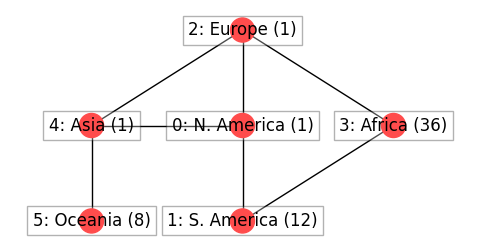

In [49]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)

# Call a new agent and set it to train mode
Agent = PolicyGradientAgent()
Agent.deploy_policy.train()
Agent.attack_policy.train()
Agent.fortify_policy.train()

game.agents = [Agent, RandomAgent(), RandomAgent()]

game.reset_world()
game.train_REINFORCE(num_games=100, max_turns=100)

game.reset_world()
win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100)

print(f"Win rate: {win_rate}")
print(f"Defeat rate: {defeat_rate}")
print(f"Tie rate: {tie_rate}")
print(f"Average number of turns: {np.mean(nb_turns)}")

# Plot the final state of the game
game.visualize()

### Random Agent Baseline

100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


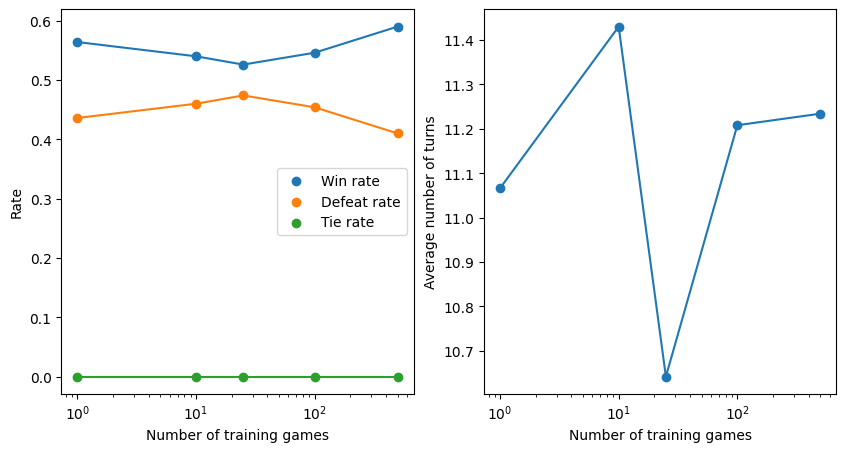

In [61]:
# Plot the win, defeat and tie rate in function of the number of training games
training_games = [1, 10, 25, 100, 500]

win_rate_history = []
defeat_rate_history = []
tie_rate_history = []
nb_turns_history = []

for nb_games in tqdm(training_games):

    game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
    game.agents = [RandomAgent(), RandomAgent(), RandomAgent()]
    game.reset_world()

    win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)
    win_rate_history.append(win_rate)
    defeat_rate_history.append(defeat_rate)
    tie_rate_history.append(tie_rate)
    nb_turns_history.append(np.mean(nb_turns))

# Scatterplots with line between points
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(training_games, win_rate_history, label="Win rate")
plt.plot(training_games, win_rate_history)
plt.scatter(training_games, defeat_rate_history, label="Defeat rate")
plt.plot(training_games, defeat_rate_history)
plt.scatter(training_games, tie_rate_history, label="Tie rate")
plt.plot(training_games, tie_rate_history)
plt.legend()
plt.xlabel("Number of training games")
plt.ylabel("Rate")
plt.xscale('log')

plt.subplot(1,2,2)
plt.scatter(training_games, nb_turns_history)
plt.plot(training_games, nb_turns_history)
plt.xlabel("Number of training games")
plt.ylabel("Average number of turns")
plt.xscale('log')

plt.show()

### Policy Gradient Agent

100%|██████████| 7/7 [00:29<00:00,  4.21s/it]


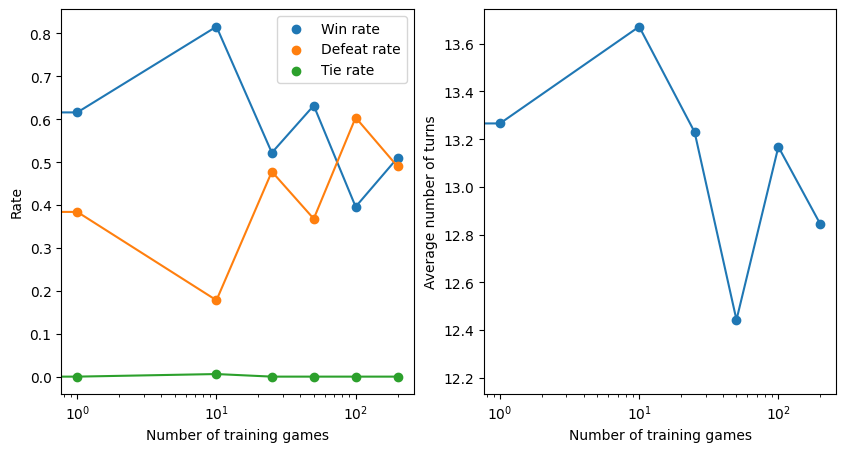

In [3]:
# Plot the win, defeat and tie rate in function of the number of training games
training_games = [0, 1, 10, 25, 50, 100, 200]

win_rate_history = []
defeat_rate_history = []
tie_rate_history = []
nb_turns_history = []

learning_rate = 1e-3
deploy_hidden_size = 32
attack_hidden_size = 32

# Fix a random seed for reproducibility and initialization of the weights
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

for nb_games in tqdm(training_games):

    game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)

    # Call a new agent and set it to train mode
    Agent = PolicyGradientAgent(learning_rate=learning_rate)
    Agent.deploy_policy.train()
    Agent.attack_policy.train()
    Agent.fortify_policy.train()

    game.agents = [Agent, RandomAgent(), RandomAgent()]

    game.reset_world()
    game.train_REINFORCE(num_games=nb_games, max_turns=100, disp_tqdm=False)
    win_rate, defeat_rate, tie_rate, nb_turns = game.eval_REINFORCE(num_games=500, max_turns=100, disp_tqdm=False)
    win_rate_history.append(win_rate)
    defeat_rate_history.append(defeat_rate)
    tie_rate_history.append(tie_rate)
    nb_turns_history.append(np.mean(nb_turns))

# Scatterplots with line between points
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(training_games, win_rate_history, label="Win rate")
plt.plot(training_games, win_rate_history)
plt.scatter(training_games, defeat_rate_history, label="Defeat rate")
plt.plot(training_games, defeat_rate_history)
plt.scatter(training_games, tie_rate_history, label="Tie rate")
plt.plot(training_games, tie_rate_history)
plt.legend()
plt.xlabel("Number of training games")
plt.ylabel("Rate")
plt.xscale('log')

plt.subplot(1,2,2)
plt.scatter(training_games, nb_turns_history)
plt.plot(training_games, nb_turns_history)
plt.xlabel("Number of training games")
plt.ylabel("Average number of turns")
plt.xscale('log')

plt.show()
